# Model CNN

In [ ]:
!pip install tensorflow matplotlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
import os


  Using cached tensorflow-2.19.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (4.0 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached h5py-3.14.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached ml_dtypes-0.5.1-cp310-cp310-macosx_10_9_universal2.whl.metadata (21 kB)
  Using cached tensorflow_io_gcs_filesystem-0.37.1-cp310-cp310-macosx_12_0_arm64.whl.metadata (14 kB)
  Using cached tensorboard_d

In [2]:
data_dir = "tenun_dataset" 
img_size = (224, 224)
batch_size = 4

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 9 images belonging to 2 classes.
Found 2 images belonging to 2 classes.


In [3]:
base_model = MobileNetV2(
    input_shape=img_size + (3,),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze pretrained CNN

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(2, activation='softmax')  # 2 kelas: ayam, manusia
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,340,098 (8.93 MB)

 Trainable params: 82,114 (320.76 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [4]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/Users/user/.pyenv/versions/3.10.0/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 470ms/step - accuracy: 0.7208 - loss: 1.0708 - val_accuracy: 1.0000 - val_loss: 0.0211
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.8889 - loss: 0.3402 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8389 - loss: 1.1446 - val_accuracy: 1.0000 - val_loss: 0.0137
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.7764 - loss: 0.6601 - val_accuracy: 1.0000 - val_loss: 0.0593
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.8944 - loss: 0.3618 - val_accuracy: 1.0000 - val_loss: 0.0995
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 1.0000 - loss: 0.1182 - val_accuracy: 1.0000 - val_loss: 0.0877
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.7764 - loss: 0.4783 - val_accuracy: 1.0000 - val_loss: 0.0803
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.1368 - val_accuracy: 1.0000 - val_loss:

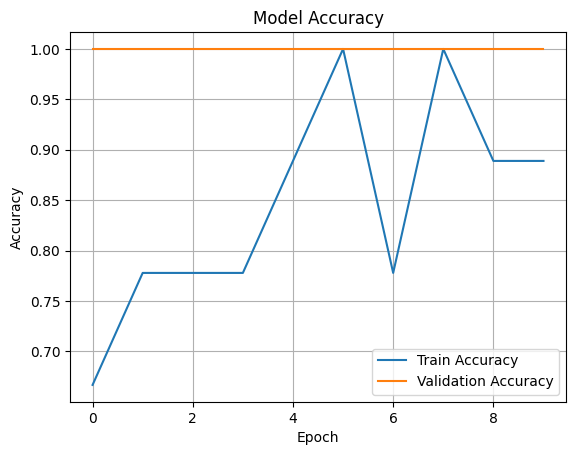

In [5]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
img_path = 'img-test.png'

img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
label_map = train_gen.class_indices
inv_map = {v: k for k, v in label_map.items()}
print("Predicted label:", inv_map[np.argmax(pred)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Predicted label: ayam
